# Assalam-o-Alaikum

## Logistic Regression from scractch
Before comming to this tutorial you may have already know what is logistic refression but for a reminder
> Logistic regression is a statistical model that can be used to predict the probability of an event

The most common logistic regression models a binary outcome; something that can take two values such as true/false, yes/no, and so on.

In [147]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [148]:
# Creating x and y
x = np.array([[0.5,1.5],[1,2],[1.5,1],[2,1],[1.5,3],[2.5,0.5]])
y = np.array([0,0,1,1,0,1])

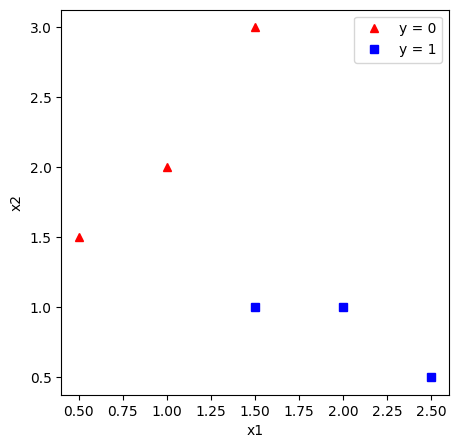

In [149]:
# Plotting the x and y using plot
fig, ax = plt.subplots(1,1,figsize=(5,5))
plt.plot(x[y==0,0],x[y==0,1], 'r^')
plt.plot(x[y==1,0],x[y==1,1], 'bs')
plt.legend(['y = 0', 'y = 1'])
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()


Logistics REgression is just a Linear Regression but with a sigmoid layer on top of it.
> Sigmoid function is used to make predictions between 0 and 1. It maps every number between 1 and 0

In [150]:
# Creating a sigmoid function for logistic Regression
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

For telling the model how it is performing we will create a loss function

In [151]:
# Creating a cost function for logistic regression
def compute_cost_logistics(x, y, w, b):
    m = x.shape[0]
    cost = 0
    for mth in range(m):
        z = np.dot(x[mth], w) + b
        sigmoid = 1 / (1 + np.exp(-z))
        cost += y[mth] * np.log(sigmoid) + (1 - y[mth]) * np.log(1 - sigmoid)
    cost = -1 / m * cost
    return cost
compute_cost_logistics(x, y, ([1,2]), 1)

3.17375628597414

For model to update its parameter based on the loss function we will use gradient descent

In [152]:
# Creating the gradient descent computation function for the logistic regression with the regularization
def compute_gradient_logistic(x, y, w, b, regularization=0):
    m = x.shape[0]
    n = x.shape[1]
    dj_dw = np.zeros((n,))
    dj_db = 0
    for i in range(m):
        z = np.dot(x[i], w) + b
        sigmoid = 1 / (1 + np.exp(-z))
        for j in range(n):
            dj_dw[j] += (sigmoid - y[i]) * x[i][j] + regularization/m * w[j]
        dj_db += (sigmoid - y[i])
        dj_dw /= m
        dj_db /= m
    return dj_dw, dj_db

In [153]:
# Using it on an example
w = np.array([2,3])
b = 1
compute_gradient_logistic(x, y, w, b)

(array([0.04157137, 0.0835741 ]), 0.027833315949033353)

Some time model can overfit or underfit. Some techniques to handle overfitting are:
1. Increase the number of training examples
2. Decrease the number of features
3. Use regularization
4. Use a different model which is less prone to overfitting

We will use regularization here

In [154]:
# Making gradient descent(training) function for trainig the logistic regression
def gradient_descent(x, y, w, b, alpha, num_iters, regularization=0):
    m = x.shape[0]
    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient_logistic(x, y, w, b, regularization=regularization)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
    return w, b

w_best, b_best = gradient_descent(x, y, np.array([1,1]),1, alpha=0.01, num_iters=10000, regularization=0.2)

Now lets plot the fitted logistic regression model

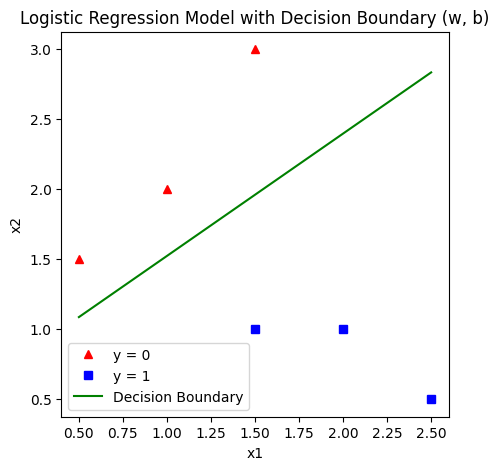

In [155]:
# Plotting our fitted logistic regression model with the data
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

# Plot data points with different colors based on labels
plt.plot(x[y == 0, 0], x[y == 0, 1], 'r^', label='y = 0')  # Red triangles for class 0
plt.plot(x[y == 1, 0], x[y == 1, 1], 'bs', label='y = 1')  # Blue squares for class 1
plt.legend()

# Decision boundary equation: y = (-w[0] * x1 - b) / w[1] (assuming w has shape (2,))
def decision_boundary(x1):
  return (-w_best[0] * x1 - b_best) / w_best[1]

# Generate range of values for x1 to plot the decision boundary
x1_min, x1_max = x[:, 0].min(), x[:, 0].max()

# Create an array of x1 values for the decision boundary
x1_boundary = np.linspace(x1_min, x1_max, 100)

# Calculate corresponding y values on the decision boundary
y_boundary = decision_boundary(x1_boundary)

# Plot the decision boundary
plt.plot(x1_boundary, y_boundary, 'g-', label='Decision Boundary')  # Green line for boundary
plt.legend()

# Set labels and title
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Logistic Regression Model with Decision Boundary (w, b)")

plt.show()

Our model fitted the decision boundary well.

We can see that the blue squares are predicted as 1, and the red triangles are predicted as 0.

In [156]:
# Now making a function to make predictions from the fitted logistic regression model
def predict(x, w, b):
    m = x.shape[0]
    p = np.zeros(m)
    for i in range(m):
        z = np.dot(x[i], w) + b
        sigmoid = 1 / (1 + np.exp(-z))
        if sigmoid > 0.5:
            p[i] = 1
        else:
            p[i] = 0
    return p

# Making predictions
x_val = np.array([[1,1],[2,2],[3,3]])
y_pred = predict(x_val, w_best, b_best)
print(y_pred)

[1. 1. 1.]


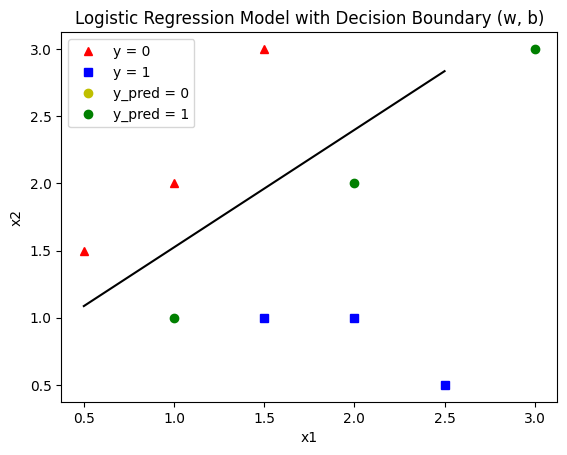

In [158]:
# Plotting the predictions to check if they are correct
plt.plot(x[y == 0, 0], x[y == 0, 1], 'r^', label='y = 0')  # Red triangles for class 0
plt.plot(x[y == 1, 0], x[y == 1, 1], 'bs', label='y = 1')  # Blue squares for class 1
plt.plot(x_val[y_pred == 0, 0], x_val[y_pred == 0, 1], 'yo', label='y_pred = 0')  # Yellow circles for predicted class 0
plt.plot(x_val[y_pred == 1, 0], x_val[y_pred == 1, 1], 'go', label='y_pred = 1')  # Green squares for predicted class 1
plt.legend()

# Also plotting the fitted decision boundary
plt.plot(x1_boundary, decision_boundary(x1_boundary), 'k-', label='Fitted Decision Boundary')  # Black line for fitted boundary

# Set labels and title
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Logistic Regression Model with Decision Boundary (w, b)")

plt.show()


We can see that the model has predicted the new data correctly. Its a success😍.

This is all for today.  
Until next time.  
Allah Hafiz  
